### Avacado Project Problem Statement

Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

### Importing Library

In [68]:
#data lib
import pandas as pd
import numpy as np
%matplotlib inline

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#models

#regression
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

#classification 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#metrics

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report
#model save
import pickle
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
data=pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
data.shape

(18249, 14)

data have 13 features & 18249 observations

In [4]:
#removing column Unnamed: 0 as it just have sno.
data.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
data.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

### Duplicacy Test

In [6]:
data.duplicated().sum()

0

no duplicay in dataset

### Categorical & Null Testing

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
data.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values in dataset.
3 features are categorical , so need to encode these features.

In [9]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [10]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

### Encoding categorical features

In [12]:
from sklearn.preprocessing import LabelEncoder

#region & type is nominal data, so encoding it using label encoder.


enc=LabelEncoder()

In [13]:
#seperating encoded feature with new name so that we can check transformed value if needed. 

data['type_enc']=enc.fit_transform(data['type'])
data['region_Enc']=enc.fit_transform(data['region'])
data['Date_enc']=enc.fit_transform(data['Date'])

In [14]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,type_enc,region_Enc,Date_enc
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0,0,51
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0,0,50
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0,0,49
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0,0,48
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0,0,47


In [16]:
#removing categorical column as we have new encoded columns.

data.drop(columns=['Date','region','type'],inplace=True)

### Describe Data

In [17]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_enc,region_Enc,Date_enc
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,0.499918,26.495644,83.997096
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,0.500014,15.583788,48.787638
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,0.000000,13.000000,42.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,0.000000,26.000000,84.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,1.000000,40.000000,126.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,1.000000,53.000000,168.000000


<AxesSubplot:>

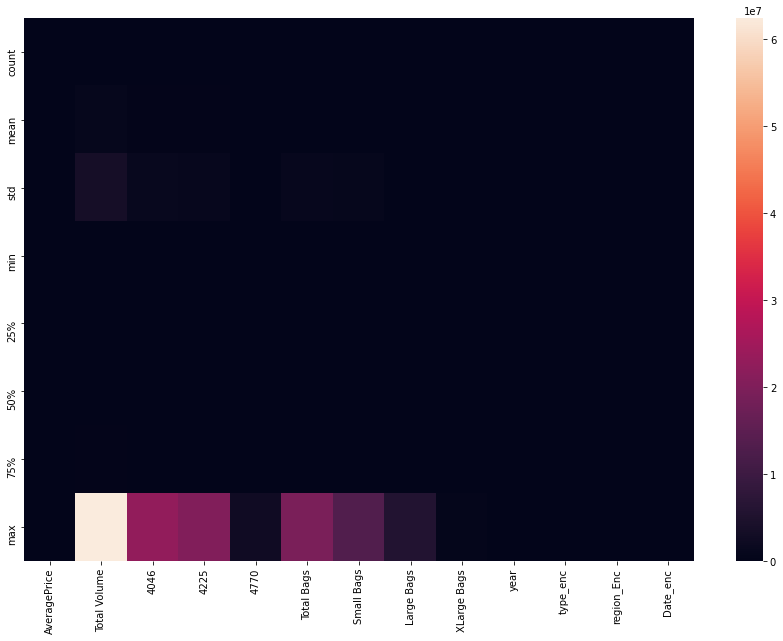

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(data.describe())

All feature having count 18249 it mean no missing values.
In few features max value is very it might be ouliers. will check it.

### Correlation Testing

In [19]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_enc,region_Enc,Date_enc
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.615845,-0.011716,0.145514
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.232434,0.174176,0.009263
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.225819,0.192073,-0.005028
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.232289,0.145726,-0.016895
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.210027,0.095252,-0.047517
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.217788,0.175256,0.064688
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.220535,0.164702,0.056902
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.193177,0.198768,0.081855
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.175483,0.082281,0.077374
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.000032,-0.000055,0.950274


<AxesSubplot:>

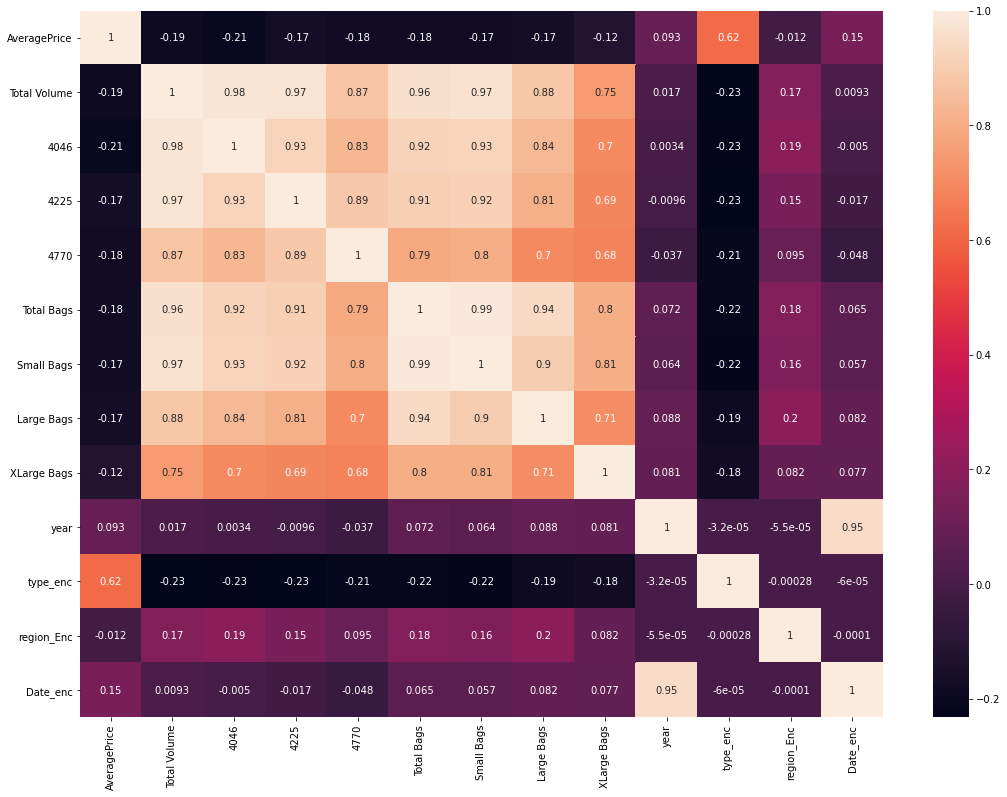

In [20]:
plt.figure(figsize=(18,13))
sns.heatmap(data.corr(),annot=True)

Average price have negative correlation with target average price.
aprt from it its showing mulicollinearity problem within features.

In [21]:
#removing features with multicollinearity

data.drop(columns=['Total Volume','Small Bags','Large Bags','4046','Date_enc'],inplace=True)

<AxesSubplot:>

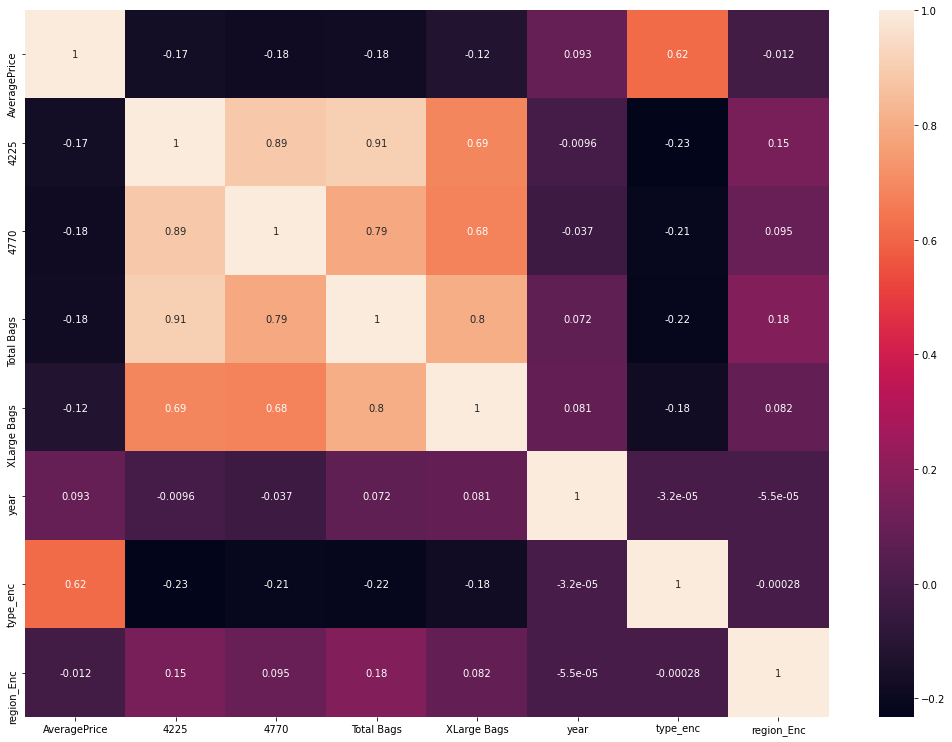

In [22]:
plt.figure(figsize=(18,13))
sns.heatmap(data.corr(),annot=True)

since we have removed few features which cleary shown muliticollinearity , will recheck it with vif if we have anymore feature. 

In [23]:
data.shape

(18249, 8)

### ScatterPlot-Test relationship with target

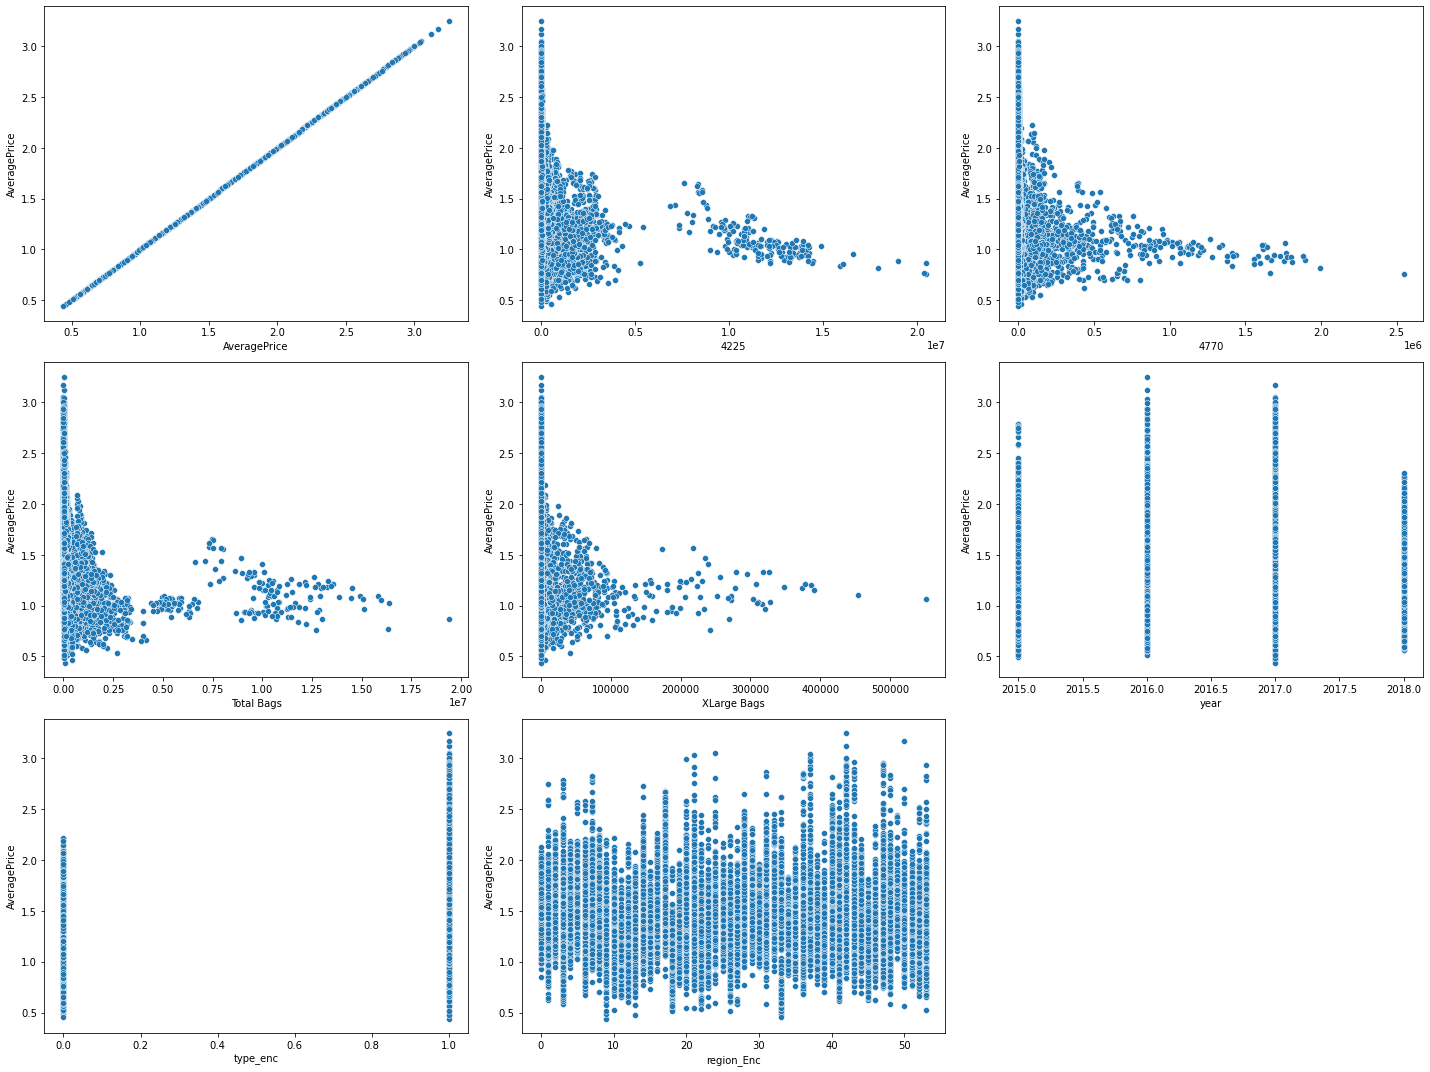

In [26]:
plt.figure(figsize=(20,15))
plotnumber=1

for col in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.scatterplot(data[col],data['AveragePrice'])
        
    plotnumber+=1  
    
plt.tight_layout()    

we can see almost all features are having relation with target.. will test it with some other methods as well. region not having any particular relation with target.

### Distribution Plot

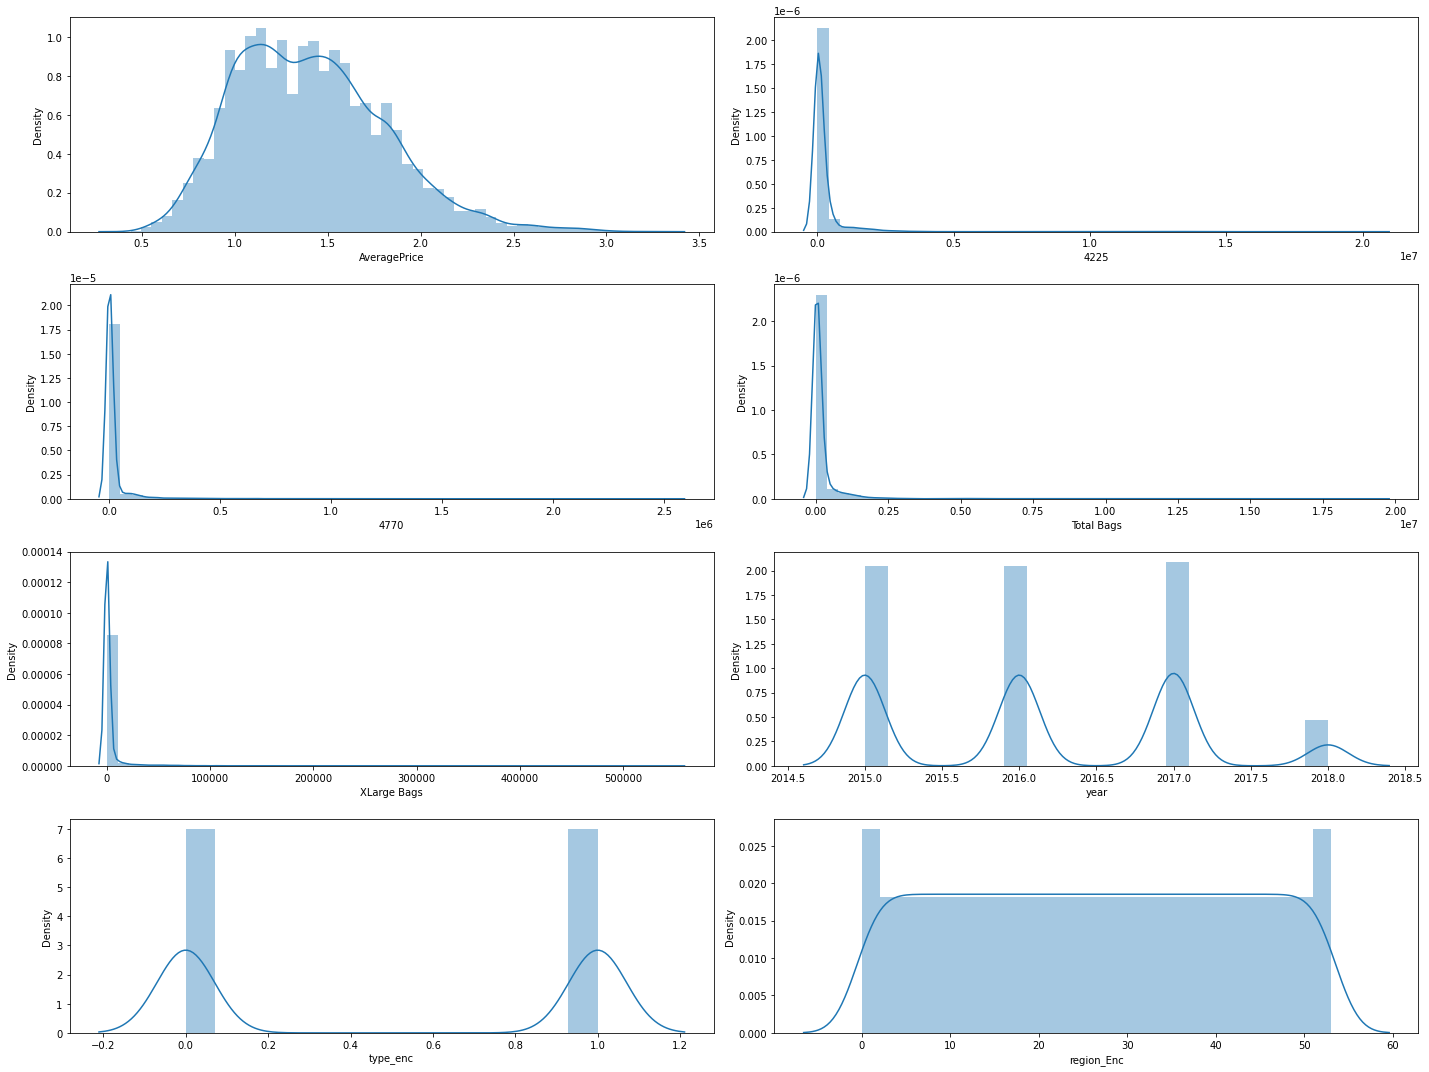

In [27]:
plt.figure(figsize=(20,15))
plotnumber=1

for col in data:
    if plotnumber<=9:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[col])
        
    plotnumber+=1  
    
plt.tight_layout() 

All features having skewness problem. will remove it.

### Removing outliers

In [41]:
from scipy.stats import zscore

z=np.abs(zscore(data))

data_new=data[(z<=3).all(axis=1)]

In [42]:
print(data.shape)
print(data_new.shape)

(18249, 8)
(17746, 8)


we have removed 603 outliers using zscore.

### Skewness test

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data_new.drop(columns=['AveragePrice'])
y=data_new.AveragePrice

In [105]:
X.skew()

4225           4.260410
4770           4.906775
Total Bags     4.509012
XLarge Bags    6.052067
year           0.226282
type_enc      -0.026828
region_Enc     0.009380
dtype: float64

we can see still columns having right skewed. but we can not remove more data because data set is like that.

### Standard scaler

In [106]:
scale=StandardScaler()
x_scale=scale.fit_transform(X)

### Testing multicollinearity

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scale,i) for i in range(x_scale.shape[1])]

vif["features"]=X.columns

vif

,vif,features
0,2.822919,4225
1,1.984314,4770
2,2.930926,Total Bags
3,1.578057,XLarge Bags
4,1.069253,year
5,1.209793,type_enc
6,1.061326,region_Enc


on a threshold 5 no multicollinearity is there.

### Train Test Split

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,random_state=270,test_size=0.25)

### Model Building

In [109]:
#models instantiating
lr=LinearRegression()
rfr=RandomForestRegressor()
svr=SVR()

In [110]:
#models fitting

lr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
svr.fit(x_train,y_train)

SVR()

In [111]:
#training score

print(lr.score(x_train,y_train))
print(rfr.score(x_train,y_train))
print(svr.score(x_train,y_train))

0.40714363167960865
0.9733982677947656
0.5304124702121393


#### Testing score

In [112]:
#linear regression
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.39433045751758133

In [113]:
#random forest reg
y_pred=rfr.predict(x_test)
r2_score(y_test,y_pred)

0.8031263197106061

In [114]:
#SVR
y_pred=svr.predict(x_test)
r2_score(y_test,y_pred)

0.5160275266091696

### Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
print('cv_score for LinearRegression: ', np.mean(cross_val_score(lr,x_train,y_train)*100))
print('\ncv_score for RandomForestRegressor: ', np.mean(cross_val_score(rfr,x_train,y_train)*100))
print('\ncv_score for SVR: ', np.mean(cross_val_score(svr,x_train,y_train)*100))

cv_score for LinearRegression:  40.627635567702846

cv_score for RandomForestRegressor:  79.63152326908894

cv_score for SVR:  51.74454391857455


#### RandomForestRegressor model is performing best amongs all, and getting same score in with test data & cv score. around 80%

### Hyper Parameter Tunning

#due to very heavy dataset couldn't perform hyper parameter tunning

### Final Score-Regression model with target AveragePrice

In [117]:
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

print('cv_score for RandomForestRegressor: ', np.mean(cross_val_score(rfr,x_train,y_train)*100))
print('R2 Score: ',r2_score(y_test,y_pred)*100)
print('Mean Square Error: ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

cv_score for RandomForestRegressor:  79.54655026621974
R2 Score:  80.43027790440003
Mean Square Error:  0.02860321711967545
Mean Absolute Error:  0.11907446472842009


# Model2 Training with same data set , Target:Region

In [118]:
#data split
X_clf=data_new.drop(columns=['region_Enc'])
y_clf=data_new.region_Enc

In [119]:
#scaling
scale=StandardScaler()
x_scale=scale.fit_transform(X_clf)

In [123]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y_clf,random_state=270,test_size=0.25)

### Model Building

In [124]:
clf=LogisticRegression()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()

In [125]:
clf.fit(x_train,y_train)
dt.fit(x_train,y_train)
rfc.fit(x_train,y_train)

RandomForestClassifier()

### Evaluation

In [126]:
#logistic regression
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.2691007437457742

In [127]:
#Decision Tree
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.6360153256704981

In [128]:
#Random Forest Classifier
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.7653820148749155

### Cross Validation

In [129]:
print('cv_score for LogisticRegression: ', np.mean(cross_val_score(clf,x_train,y_train)*100))
print('\ncv_score for DecisionTreeClassifier: ', np.mean(cross_val_score(dt,x_train,y_train)*100))
print('\ncv_score for RandomForestClassifier: ', np.mean(cross_val_score(rfc,x_train,y_train)*100))

cv_score for LogisticRegression:  27.1169162720217

cv_score for DecisionTreeClassifier:  62.649329110610985

cv_score for RandomForestClassifier:  75.7682342069309


#### RandomForestClassifier model is performing best amongs all, and getting same score in with test data & cv score. around 76%.

### Hyper Parameter Tunning

Due to big dataset couldn't perform parameter tunning

### Final Score-Classification model with target Region

In [131]:
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

print('cv_score for RandomForestRegressor: ', np.mean(cross_val_score(rfc,x_train,y_train)*100))
print('R2 Score: ',accuracy_score(y_test,y_pred)*100)
print('Mean Square Error: ',classification_report(y_test,y_pred))


cv_score for RandomForestRegressor:  75.58791865471451
R2 Score:  75.9972954699121
Mean Square Error:                precision    recall  f1-score   support

           0       0.81      0.87      0.84        82
           1       0.61      0.60      0.60        85
           2       0.86      0.90      0.88        78
           3       0.72      0.74      0.73        70
           4       0.89      0.86      0.87        84
           5       0.67      0.79      0.73        84
           6       0.92      0.86      0.89        64
           7       0.84      0.79      0.81        86
           8       0.92      0.93      0.92        85
           9       0.66      0.64      0.65        85
          10       0.63      0.53      0.57        89
          11       0.78      0.80      0.79        97
          12       0.88      0.72      0.79        88
          13       0.61      0.74      0.67        80
          14       0.70      0.66      0.68        89
          15       0.81      0.8

Since its multiple label classfication so not forming AUC-ROC

### Model Save

In [132]:
filename='avacado_project_classifier.pickle'

pickle.dump(rfc,open(filename,'wb'))

In [133]:
filename='avacado_project_Regression.pickle'

pickle.dump(rfr,open(filename,'wb'))